# Cardic Arrest Risk Prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(20,20)

## Reading Dataset

In [2]:
df=pd.read_csv("ML11 Clustering Cardic Arrest Data.csv") 

In [3]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [4]:
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### EDA

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Chain_smoker'}>,
        <AxesSubplot:title={'center':'Consumes_other_tobacco_products'}>],
       [<AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'Obese'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Metabolic_syndrome'}>,
        <AxesSubplot:title={'center':'Use_of_stimulant_drugs'}>,
        <AxesSubplot:title={'center':'Family_history'}>],
       [<AxesSubplot:title={'center':'History_of_preeclampsia'}>,
        <AxesSubplot:title={'center':'CABG_history'}>,
        <AxesSubplot:title={'center':'Respiratory_illness'}>]],
      dtype=object)

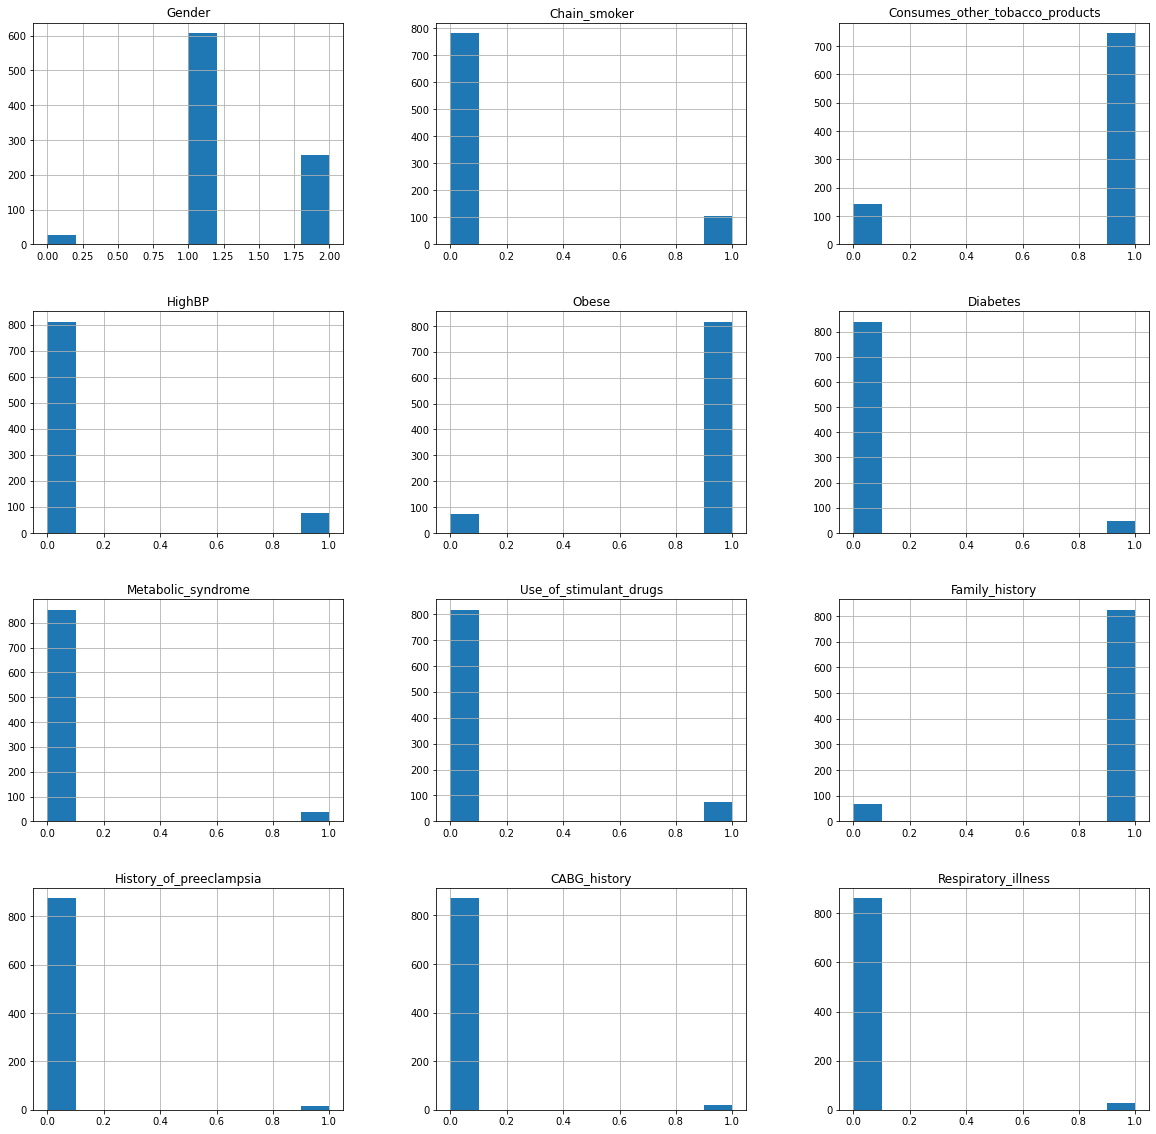

In [5]:
df.hist(figsize=(20,20))

In [6]:
df.isna().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [7]:
df['Gender'].unique()

array([1, 2, 0], dtype=int64)

In [8]:
# df['UnderRisk']=le.fit_transform(df['UnderRisk'])
df=df.drop('UnderRisk',axis=1)

### Applying Algorithm Kmeans & Viewing Cluster Center

In [9]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
model=KMeans(2,random_state=1)
model.fit(df)
model.cluster_centers_

array([[2.00000000e+00, 6.25000000e-02, 9.06250000e-01, 6.25000000e-02,
        9.29687500e-01, 2.73437500e-02, 1.95312500e-02, 7.42187500e-02,
        9.41406250e-01, 1.04083409e-17, 7.81250000e-03, 3.90625000e-02],
       [9.58925750e-01, 1.43759874e-01, 8.10426540e-01, 9.63665087e-02,
        9.14691943e-01, 6.63507109e-02, 5.21327014e-02, 8.53080569e-02,
        9.19431280e-01, 2.52764613e-02, 2.68562401e-02, 3.00157978e-02]])

In [11]:
predicted=model.fit_predict(df)

In [12]:
df['cluster']=predicted

In [13]:
df[['cluster']]

,cluster
0,1
1,1
2,1
3,1
4,1
...,...
884,0
885,1
886,1
887,0


#### Checking Cluster Accuracy

In [14]:
silhouette_score(df,predicted)

0.4981285637165637

### Creating Labeled Cluster column

In [15]:
for i in range(2,30):
    model=KMeans(i,random_state=12)
    predicted=model.fit_predict(df)
    
    
    print(f'for cluster value {i} score is {silhouette_score(df,predicted)}')

for cluster value 2 score is 0.4981285637165637
for cluster value 3 score is 0.5436994478346838
for cluster value 4 score is 0.528826662927437
for cluster value 5 score is 0.5698059422753312
for cluster value 6 score is 0.5856964701120927
for cluster value 7 score is 0.5994098939288823
for cluster value 8 score is 0.6410609688910938
for cluster value 9 score is 0.6626425092655385
for cluster value 10 score is 0.6929786038415895
for cluster value 11 score is 0.6918715764421813
for cluster value 12 score is 0.7125387198255838
for cluster value 13 score is 0.7216080482329427
for cluster value 14 score is 0.7415527253717742
for cluster value 15 score is 0.7695968751813115
for cluster value 16 score is 0.7693417777499347
for cluster value 17 score is 0.7732293343747506
for cluster value 18 score is 0.7802923417681866
for cluster value 19 score is 0.7906803059685479
for cluster value 20 score is 0.8097556942079494
for cluster value 21 score is 0.81170946458302
for cluster value 22 score is 0

In [16]:
df['Risk']=df['cluster'].replace({1:'get stroke',0:'not get stroke'})

In [17]:
df['Risk']

0          get stroke
1          get stroke
2          get stroke
3          get stroke
4          get stroke
            ...      
884    not get stroke
885        get stroke
886        get stroke
887    not get stroke
888        get stroke
Name: Risk, Length: 889, dtype: object

### Reading Data Againg and Plotting Dendrom Graph

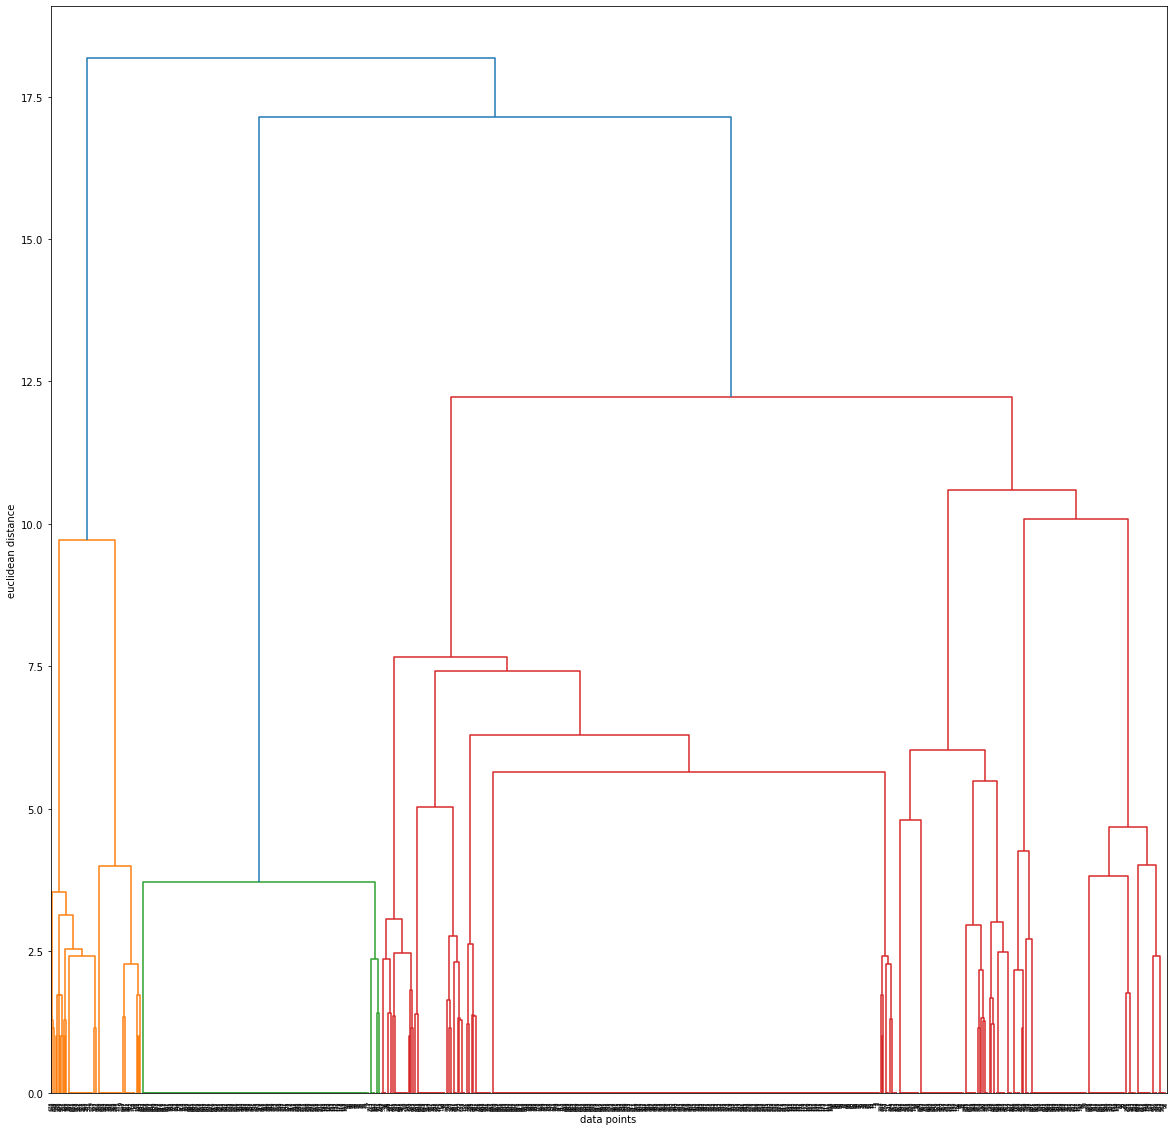

In [18]:
df=pd.read_csv("ML11 Clustering Cardic Arrest Data.csv")
df=df.drop('UnderRisk',axis=1)
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
# plt.figure(figsize=(25,25))
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.xticks(label=35)
plt.yticks(label=35)
plt.show()

### Calling Hirearchical Clustering Algorithm

In [19]:
model=AgglomerativeClustering()

In [22]:
# df=df.drop('Risk',axis=1)
predicted=model.fit_predict(df)

In [23]:
df['cluster']=predicted

In [24]:
df[['cluster']]

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
884,0
885,0
886,0
887,1


#### Checking Cluster Accuracy

In [25]:
silhouette_score(df,predicted)

0.5390208253186523

### Creating Labeled Cluster column

In [26]:
df['Risk']=df['cluster'].replace({0:'get stroke',1:'not get stroke'})

In [27]:
df['Risk']

0          get stroke
1          get stroke
2          get stroke
3          get stroke
4      not get stroke
            ...      
884        get stroke
885        get stroke
886        get stroke
887    not get stroke
888        get stroke
Name: Risk, Length: 889, dtype: object

In [28]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,cluster,Risk
0,1,1,1,0,1,0,0,0,1,0,0,0,0,get stroke
1,1,0,1,0,1,0,0,0,1,0,0,0,0,get stroke
2,1,0,1,0,1,0,0,0,1,0,0,0,0,get stroke
3,1,0,1,0,1,0,0,0,1,0,0,0,0,get stroke
4,1,0,0,0,0,0,1,1,0,0,0,0,1,not get stroke
